In [1]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "../indata/3pipes3.inp"        #name of .inp file
fcr = "../indata/bcs3pipesr.config"  #name of .config file
fc0 = "../indata/bcs3pipes0.config"  
mtype = 1                        #model used along network edges. 1 for Preissman Slot. 0 for uniform
n0 = PyNetwork(fi, fc0, mtype)   #a network with Q==0 at boundaries
nr = PyNetwork(fi, fcr,mtype)    #a network with reflecting BCs
print n0 
n0.showLayout()               #print the layout of the network



Network at address 0x104eb0f00 with 4 nodes and 3 edges

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  1         | 3


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  3
  2     |  1
  3     |  1


In [3]:
#n1.showCurrentData()    
dt = n0.T/n0.M
V00 = n0.getTotalVolume()
n0.runForwardProblem(dt)  #solve up to time T
V0r = nr.getTotalVolume()
nr.runForwardProblem(dt)


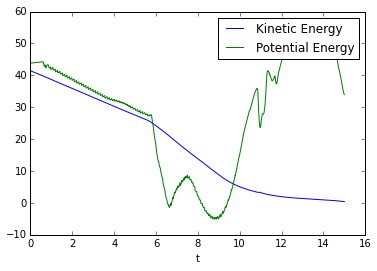

In [4]:
Ke = np.array([nr.getKE(i) for i in range(n0.M)])
Pe = np.array([nr.getPE(i) for i in range (n0.M)])
t= linspace(0,n0.T,n0.M)
plot(t,Ke,t,Pe)
E0 = Ke[0]+Pe[0]
legend(['Kinetic Energy', 'Potential Energy'])
ax = gca()
ax.set_xlabel('t')
#plot(t,(Ke+Pe)/E0)

In [5]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n0.T,n0.solve_time)
print "Initial Volume is %f"%V00

dV0 = V00-n0.getTotalVolume()
dVr = V0r-nr.getTotalVolume()
print "         Q =0             reflecting       "
print "V0       %3.5f        %3.5f" %(V00,V0r)
print "Vf       %3.5f        %3.5f" %(n0.getTotalVolume(), nr.getTotalVolume())
print "dV       %3.5f          %3.5f" % (dV0,dVr)
print "dV/V0    %e     %e"%(dV0/V00, dVr/V0r)

Elapsed time is 15.00000 s, solve time is 4.61848 s
Initial Volume is 168.393590
         Q =0             reflecting       
V0       168.39359        168.39359
Vf       167.87537        168.39359
dV       0.51822          -0.00000
dV/V0    3.077442e-03     -4.438614e-12


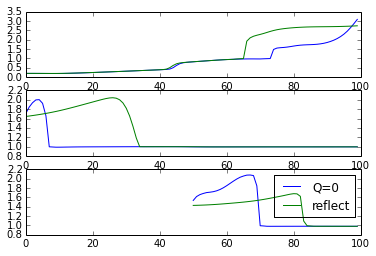

max(H(x,T))
     Q = 0       reflecting
pipe 0  3.083551    2.743045
pipe 1  2.002225    2.042987
pipe 2  2.075336    1.677040
space-average grad(H)
        Q = 0       reflecting
max  72.683193   71.435386
mean 7.081183   7.228392


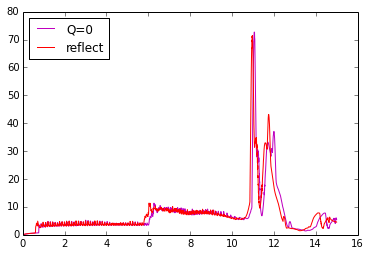

In [6]:
qi = [n0.q(i) for i in range(n0.Nedges)]
hi = [n0.getHofA(i) for i in range(3)]
hir = [nr.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n0.Ns[i]] for i in range(3)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n0.Ns[i])])

fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[2]]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].plot(x,hir[k],'g')
    #ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    #ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
legend(['Q=0', 'reflect'])
#savefig("../../solultion_r66.pdf", format='pdf')
plt.show()

umax = max(abs(max(ui)) for ui in u)
print "max(H(x,T))"
print "     Q = 0       reflecting"
for i in range(3):
    print "pipe %d  %f    %f" %(i, max(hi[i]), max(hir[i]))
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
Hbarr = [nr.getAveGradH(i) for i in range(nr.M+1)]
t = np.linspace(0,n0.T,n0.M+1)
plot(t,Hbar,'m')
plot(t,Hbarr,'r')
legend(['Q=0', 'reflect'], loc ='upper left')
#savefig("../../gradH_r66.pdf", format='pdf')
print "space-average grad(H)"
print "        Q = 0       reflecting"
print "max  %f   %f" %(max(Hbar),max(Hbarr))
print "mean %f   %f" %(mean(Hbar), mean(Hbarr))



In [7]:
def it(i,n,N):
    return (N+2)*n+i;

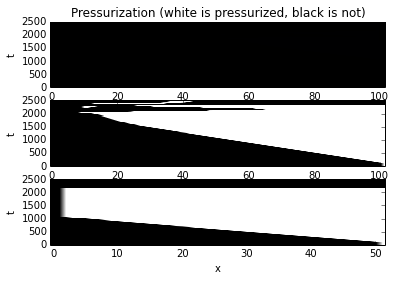

In [8]:
#plot whether or not pipe is pressurized in space and time
fig,ax = plt.subplots(nrows = n0.Nedges)
ax[0].set_title('Pressurization (white is pressurized, black is not)')
x0 = [0,0,100.-n0.Ns[-1]]
t = np.linspace(0,n0.T,n0.M+2)
for k in range(n0.Nedges):
    phist = n0.phist(k)
    p = phist.reshape(n0.M+2,n0.Ns[k]+2)
    s = shape(p)
    p2 = p.astype(int)
    x = np.linspace(0,n0.Ls[k], n0.Ns[k]+2)
    X,T = np.meshgrid(x,t)
    cf = ax[k].imshow(p2, aspect='auto',origin='lower')
    ax[k].set_xlabel('x')
    ax[k].set_ylabel('t')
    cf.set_cmap(plt.cm.bone)
#cb = colorbar(cf, ticks = [0,1], orientation = 'horizontal')
#cb.ax.set_xticklabels(['False', 'True'])
    #ax[k].set_ylim([0,ymaxs[i]])
    #ax[k].set_xlim([0,100])



In [9]:
ndof = 15
xgood = [-0.6746336425052268, 0.3929209271302193, 0.1973050791881181, -0.05013525191675948, 0.23496014533696993, 0.05708314708689007, 0.3522406842364152, -0.09905964763856627, 0.0734732917634615, -0.5896266740705881, -0.0792411751293785, -0.07888391087489807, -0.3046798334842904, 0.520074906919188, -0.2943897531723091, -0.14160338303198525, -8.623427645223251e-06, -3.6521105914176848e-06, -1.2484771645342056e-05, 9.792962812864235e-06, 1.0745510279929457e-05, 1.2520849540545679e-05, -4.544559347600004e-06, -1.155025325385363e-06, 9.041571992302412e-06, -2.1574126074518583e-05, -6.199034669364961e-06, 4.843472497262422e-06, -2.7997384888334016e-06, -1.0799020768271911e-05, -3.523753990486484e-06, 5.9742214963075885e-06]
wn = 0
x0 = 0*np.ones(ndof)
for i in range(ndof/2):
    x0[2*i+1] = 0
#for i in range(len(x0)):
#    x0[i] = xgood[i]
Vin = V00/4
opt1 = PyBC_opt_dh(fi, fc0, ndof, x0, wn,Vin,1)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype


f is 32268.352329
T is 15.000000
Using Fourier modes


In [10]:
opt1.solve()

In [11]:
print opt1.f
print opt1.x
ndof2 = 15
x02 = np.zeros(ndof2);
opt2 = PyBC_opt_dh(fi, fc0, ndof, x0, wn,Vin,0)
#opt2 = PyBC_opt_dh(fi, fc0, ndof2, x02, 0, wn)
f02 = opt2.f
opt2.compute_f()
print "f is %f" %opt2.f
print "T is %f" %opt2.T
print "Using %s modes" %opt2.modetype



17227.6059566
[0.49682931868722674, 0.5426401725846673, -0.08955121301726177, 0.05184017034361899, 0.0670583239436772, -0.09241904634229749, 0.11455615890835706, 0.01578734680163118, 0.27385914884387724, -0.36835693338907305, -0.3160191099244874, 0.05368152274471564, -0.14843465843565165, 0.0032208003505992014, -0.005635062828257603]
f is 181562.009604
T is 15.000000
Using Hermite modes


In [12]:

opt2.solve()


[0.49682931868722674, 0.5426401725846673, -0.08955121301726177, 0.05184017034361899, 0.0670583239436772, -0.09241904634229749, 0.11455615890835706, 0.01578734680163118, 0.27385914884387724, -0.36835693338907305, -0.3160191099244874, 0.05368152274471564, -0.14843465843565165, 0.0032208003505992014, -0.005635062828257603]
[-0.00436661856315474, 0.037995039934928976, -0.03733906074287819, 7.248308187022244e-06, -2.2959855989051618e-07, -1.9352637956148348e-05, -1.692640008311273e-05, -1.7579260907275245e-05, -0.13643310447125323, -9.459679057791734e-05, -0.13599224846812163, -0.00018624398560258728, -0.31410926277493056, 0.050500649998199566, -0.021393807571349663]
max discrepancy is 4.134832e+00


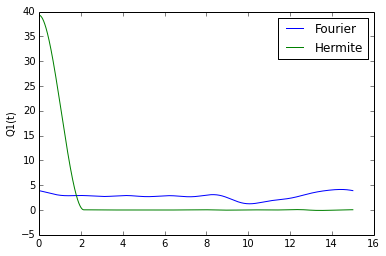

In [13]:
#import matplotlib.pyplot as plt

ff = opt1.f
ff2 = opt2.f
Q1 = opt1.getBCtimeseries()
#Q2 = opt1.getBCtimeseries()
Q12 = opt2.getBCtimeseries()
#Q22  = opt2.getBCtimeseries(1)
t = np.linspace(0,opt1.T, opt1.M+1)
fig,ax = plt.subplots(nrows = 1)


ax.plot(t,Q1,'b')#,t,np.zeros(opt1.M+1),'r')
ax.plot(t,Q12,'g')
ax.set_ylabel('Q1(t)')

#ax[0].plot(t,Q1,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[0].plot(t,Q12,'g')
#ax[0].set_ylabel('Q1(t)')
#ax[1].plot(t,Q2,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[1].plot(t,Q22, 'g')
legend([opt1.modetype, opt2.modetype])
#ax[1].set_xlabel('t')
#ax[1].set_ylabel('Q2(t)')
#savefig("../../optcythondemo.pdf", format='pdf')
#print max(abs(Q2[i]) for i in range(len(Q2)))
print opt1.x
print opt2.x
print "max discrepancy is %e"%max([Q1[i]-Q12[i] for i in range(len(Q1))])



In [14]:
print "                 %s         %s"    %(opt1.modetype, opt2.modetype)
print "CPU time (s)     %4.2f     %4.2f" % (opt1.solve_t, opt2.solve_t)
print "actual time (s)  %4.2f      %4.2f" % (opt1.wsolve_t,opt2.wsolve_t)
#print "parallel speedup %1.1f         %1.1f "%(opt1.solve_t/opt1.wsolve_t, opt2.solve_t/opt2.wsolve_t)
print "f0               %4.2f      %4.2f"%(f0,f0)
print "ff               %4.2f       %4.2f" %(ff,ff2)
print "f0/ff  =         %.5f     %.5f"%(ff/f0, ff2/f0)
#print opt1.x

                 Fourier         Hermite
CPU time (s)     1574.40     621.47
actual time (s)  236.92      144.04
f0               32268.35      32268.35
ff               17227.61       174317.78
f0/ff  =         0.53389     5.40213
